# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [28]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [5]:
## Data loading
data_name = 'stock'
seq_len = 5

if data_name in ['stock', 'energy']:
    ori_data, scaler= real_data_loading(data_name, seq_len)
elif data_name == 'sine':
    # Set number of samples and its dimensions
    no, dim = 10000, 5
    ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')

stock dataset is ready.


## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [6]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'lstm' 
parameters['hidden_dim'] = 5
parameters['num_layer'] = 3
parameters['iterations'] = 5000
parameters['batch_size'] = 128

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [7]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Start Embedding Network Training
step: 0/5000, e_loss: 0.4178
step: 1000/5000, e_loss: 0.2921
step: 2000/5000, e_loss: 0.3014
step: 3000/5000, e_loss: 0.2835
step: 4000/5000, e_loss: 0.1666
Finish Embedding Network Training
Start Train

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [8]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use tf.global_variables instead.
Discriminative score: 0.4409


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [9]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

Predictive score: 0.1991


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

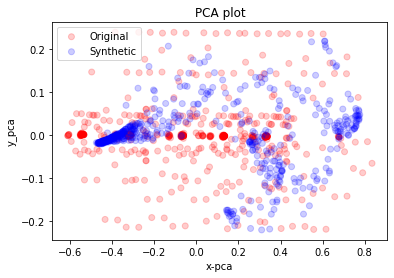

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1100 samples in 0.016s...
[t-SNE] Computed neighbors for 1100 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1100
[t-SNE] Computed conditional probabilities for sample 1100 / 1100
[t-SNE] Mean sigma: 0.017421
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.956474
[t-SNE] KL divergence after 300 iterations: 0.442849


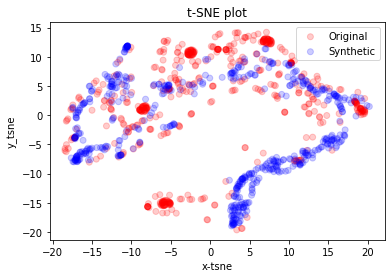

In [10]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

In [13]:
generated_data.shape

(550, 5, 10)

In [18]:
print(len(ori_data), len(ori_data[0]))

550 5


In [14]:
generated_data[0]

array([[0.86979944, 0.99995989, 0.85357332, 0.95706487, 0.8953346 ,
        0.99997056, 0.        , 0.85393977, 0.83281268, 0.463092  ],
       [0.78576899, 0.99998784, 0.79371089, 0.99558711, 0.93470788,
        0.99999052, 0.        , 0.79422867, 0.77299814, 0.71213609],
       [0.71940255, 0.99998856, 0.74827436, 0.99810731, 0.9438237 ,
        0.99999094, 0.        , 0.7483536 , 0.72846042, 0.78880787],
       [0.73055929, 0.99998814, 0.75594463, 0.99799937, 0.94291383,
        0.99999058, 0.        , 0.75599605, 0.73600639, 0.78425223],
       [0.76557446, 0.9999876 , 0.7800215 , 0.99721336, 0.93907946,
        0.99999028, 0.        , 0.78015137, 0.75969742, 0.75548631]])

In [21]:
g_data = np.reshape(generated_data, (2750, 10))

In [24]:
g_data = scaler.inverse_transform(g_data)

In [26]:
g_data[0]

array([1.69041165e+06, 7.83599996e+03, 1.59411789e+13, 4.60415000e+03,
       1.12446386e+06, 7.83599997e+03, 1.00000000e+00, 1.25596180e+08,
       1.80724350e+08, 5.85236800e+00])

In [32]:
df_generated = pd.DataFrame(g_data)

In [33]:
df_generated.head()

,0,1,2,3,4,5,6,7,8,9
0,1.690412e+06,7835.999960,1.594118e+13,4604.149998,1.124464e+06,7835.999971,1.0,1.255962e+08,1.807244e+08,5.852368
1,1.687837e+06,7835.999988,1.578971e+13,4664.129131,1.173913e+06,7835.999991,1.0,1.193652e+08,1.801691e+08,6.848544
2,1.685803e+06,7835.999989,1.567475e+13,4668.053088,1.185362e+06,7835.999991,1.0,1.145780e+08,1.797556e+08,7.155231
3,1.686145e+06,7835.999988,1.569416e+13,4667.885019,1.184219e+06,7835.999991,1.0,1.153755e+08,1.798257e+08,7.137009
4,1.687218e+06,7835.999988,1.575508e+13,4666.661207,1.179404e+06,7835.999990,1.0,1.178961e+08,1.800456e+08,7.021945


In [36]:
df_generated.shape

(2750, 10)

In [34]:
df_ori = pd.read_csv('./data/stock_data.csv')

In [35]:
df_ori.shape

(555, 10)

In [37]:
df_generated.columns = df_ori.columns

In [41]:
df_generated = df_generated.astype(int)

In [42]:
df_generated.head()

,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/prefixes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/current-prefixes,v_/ports#link-tr-ssm-b-1-y/metrics/network-outgoing-bytes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/total-entries,v_/ports#link-intgw-exgw-a-3-x/metrics/network-outgoing-bytes-rate,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/total-entries,v_/devices#RR-01/power_state,n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/diffserv-info/diffserv-target-classifier-stats/queuing-stats/drop-pkts,v_/ports#link-tr-intgw-a-3-x/metrics/network-incoming-bytes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw
0,1690411,7835,15941178927751,4604,1124463,7835,1,125596180,180724350,5
1,1687836,7835,15789713130224,4664,1173913,7835,1,119365154,180169067,6
2,1685803,7835,15674748202030,4668,1185362,7835,1,114577957,179755606,7
3,1686145,7835,15694155777574,4667,1184219,7835,1,115375469,179825658,7
4,1687218,7835,15755075810374,4666,1179403,7835,1,117896146,180045591,7


In [43]:
df_generated.to_csv('./data/generated_data.csv')

array([[<AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/prefixes'}>,
        <AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/total-entries'}>,
        <AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/total-entries'}>],
       [<AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/current-prefixes'}>,
        <AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw'}>,
        <AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/diffserv-info/diffserv-target-classifier-stats/queuing-stats/drop-pkts'}>],
       [<AxesSubplot:title={'center':'v_/devices#R

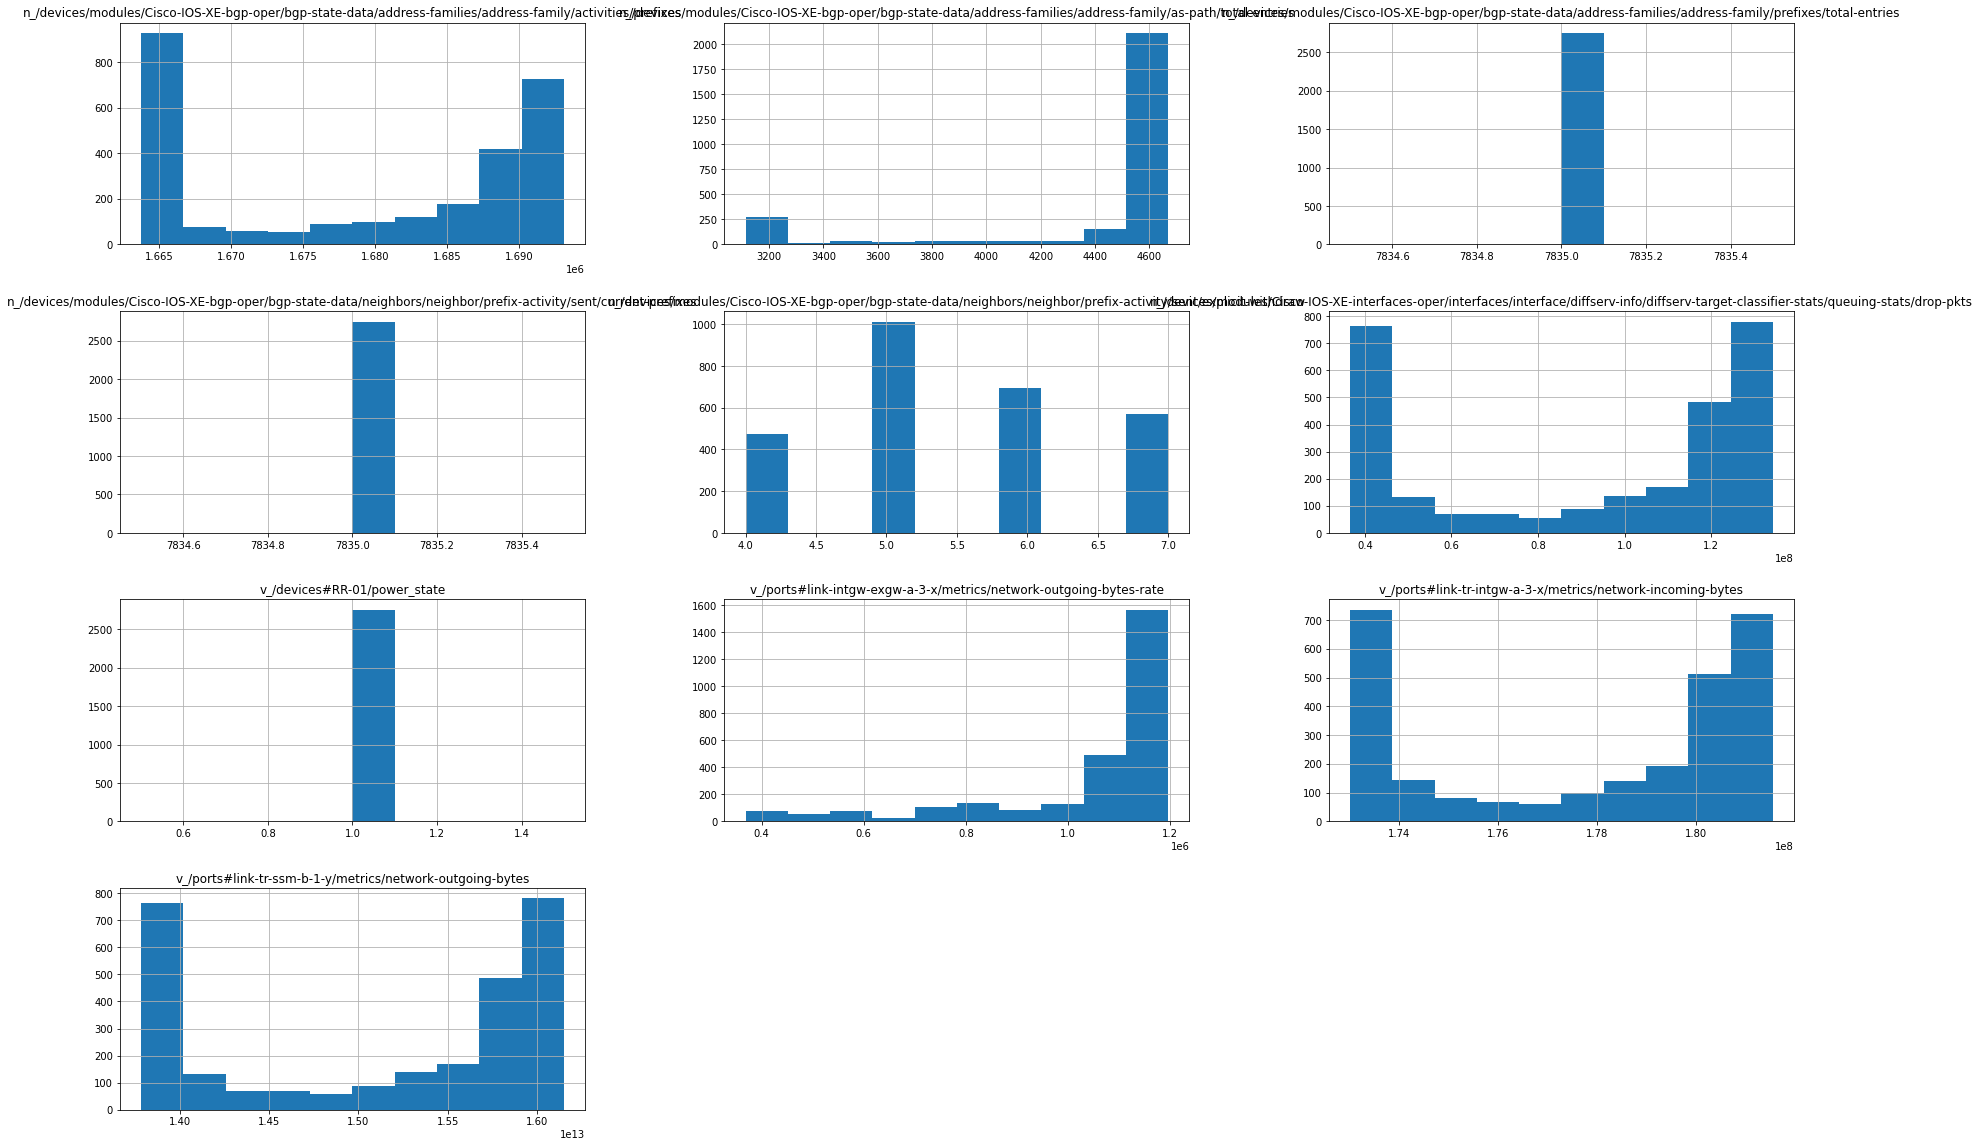

In [45]:
df_generated.hist(figsize=(30,20))

array([[<AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/prefixes'}>,
        <AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/total-entries'}>,
        <AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/total-entries'}>],
       [<AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/current-prefixes'}>,
        <AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw'}>,
        <AxesSubplot:title={'center':'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/diffserv-info/diffserv-target-classifier-stats/queuing-stats/drop-pkts'}>],
       [<AxesSubplot:title={'center':'v_/devices#R

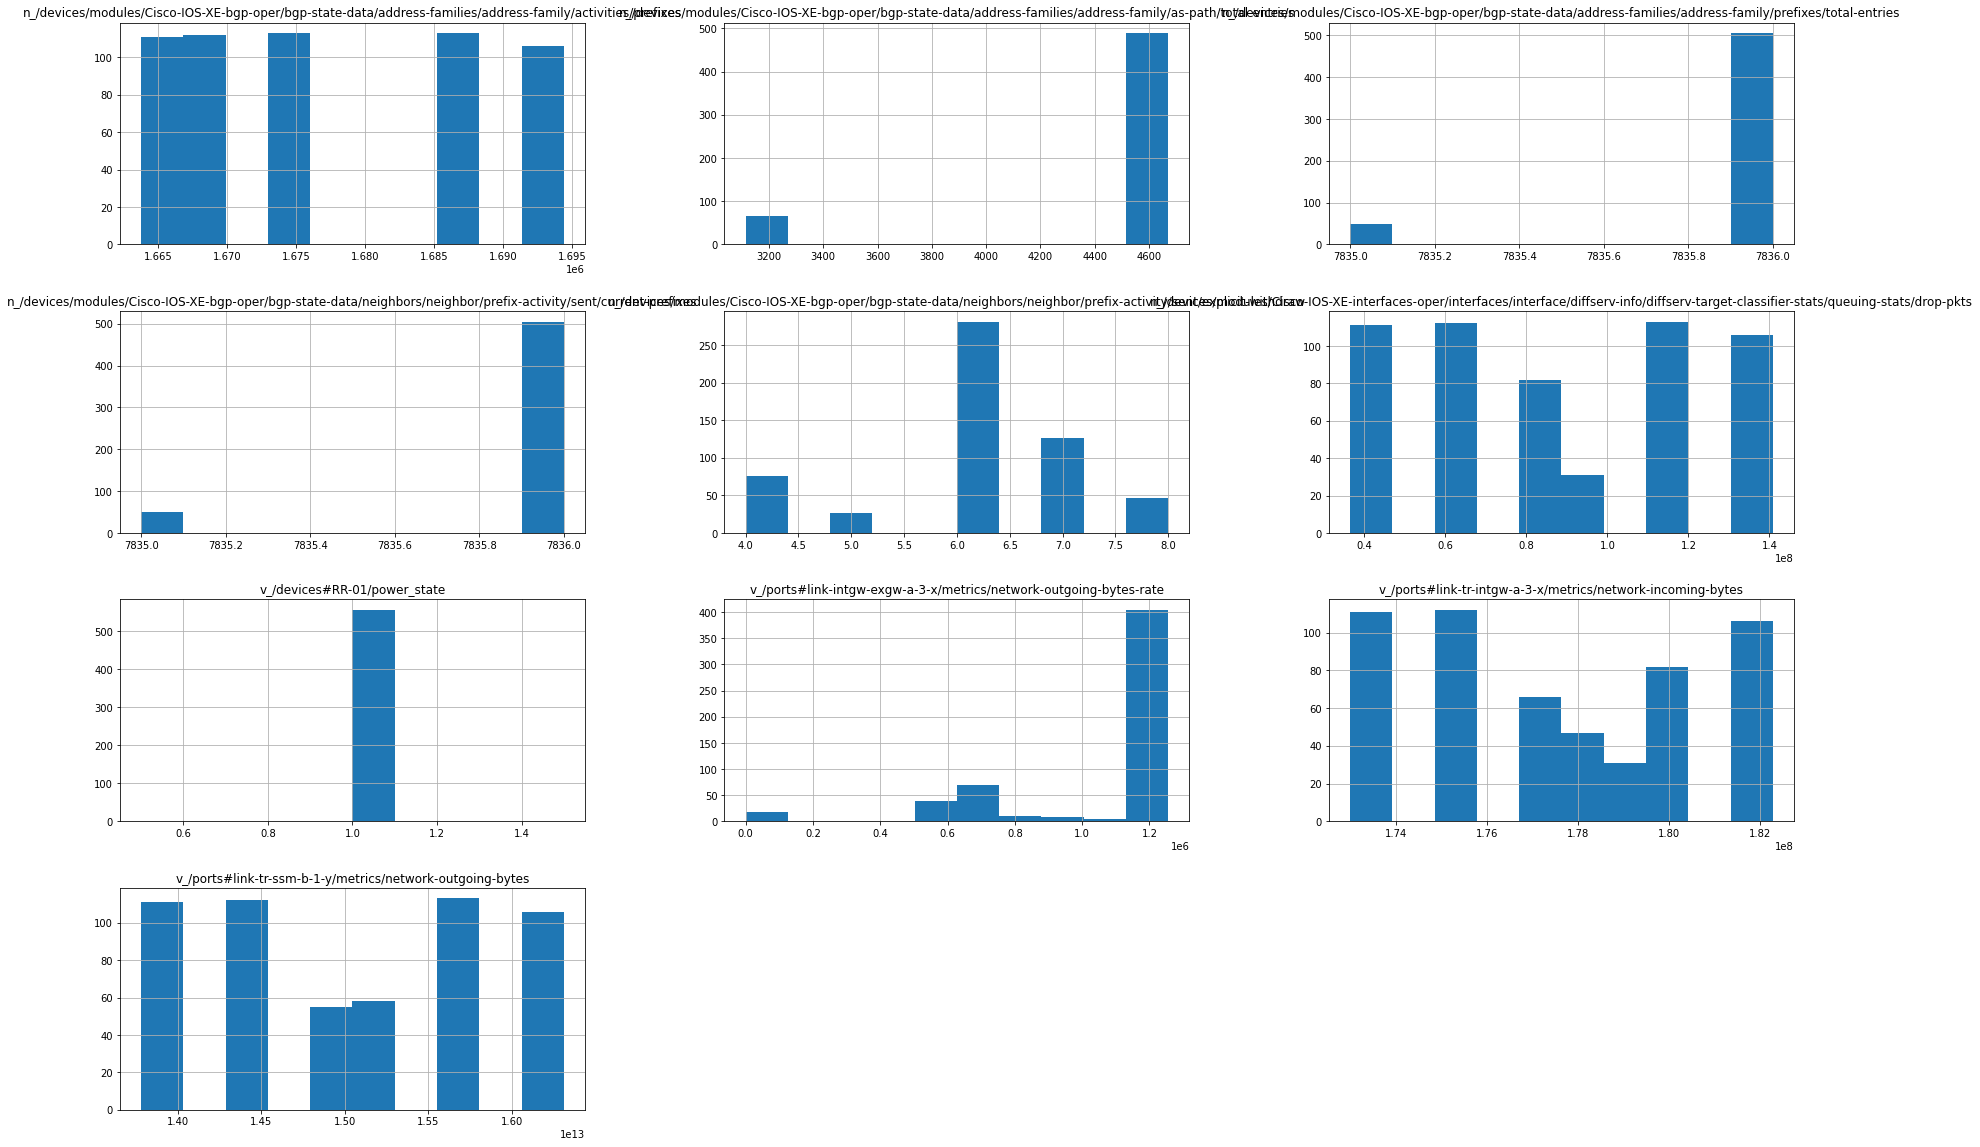

In [46]:
df_ori.hist(figsize=(30,20))

In [47]:
df_generated.describe()

,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/prefixes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/current-prefixes,v_/ports#link-tr-ssm-b-1-y/metrics/network-outgoing-bytes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/total-entries,v_/ports#link-intgw-exgw-a-3-x/metrics/network-outgoing-bytes-rate,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/total-entries,v_/devices#RR-01/power_state,n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/diffserv-info/diffserv-target-classifier-stats/queuing-stats/drop-pkts,v_/ports#link-tr-intgw-a-3-x/metrics/network-incoming-bytes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw
count,2.750000e+03,2750.0,2.750000e+03,2750.000000,2.750000e+03,2750.0,2750.0,2.750000e+03,2.750000e+03,2750.000000
mean,1.678831e+06,7835.0,1.508929e+13,4412.351273,1.034728e+06,7835.0,1.0,9.040895e+07,1.776986e+08,5.494909
std,1.182745e+04,0.0,9.264191e+11,482.817154,1.975026e+05,0.0,0.0,3.824741e+07,3.300311e+06,1.003346
min,1.663762e+06,7835.0,1.378390e+13,3114.000000,3.685300e+05,7835.0,1.0,3.657500e+07,1.730052e+08,4.000000
25%,1.664172e+06,7835.0,1.392685e+13,4537.250000,1.027050e+06,7835.0,1.0,4.246868e+07,1.735983e+08,5.000000
50%,1.683328e+06,7835.0,1.553719e+13,4616.000000,1.122180e+06,7835.0,1.0,1.088579e+08,1.792456e+08,5.000000
75%,1.690362e+06,7835.0,1.594181e+13,4660.000000,1.148547e+06,7835.0,1.0,1.256250e+08,1.807300e+08,6.000000
max,1.693128e+06,7835.0,1.615008e+13,4670.000000,1.196570e+06,7835.0,1.0,1.342253e+08,1.815516e+08,7.000000


In [48]:
df_ori.describe()

,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/activities/prefixes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/current-prefixes,v_/ports#link-tr-ssm-b-1-y/metrics/network-outgoing-bytes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/as-path/total-entries,v_/ports#link-intgw-exgw-a-3-x/metrics/network-outgoing-bytes-rate,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/prefixes/total-entries,v_/devices#RR-01/power_state,n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/diffserv-info/diffserv-target-classifier-stats/queuing-stats/drop-pkts,v_/ports#link-tr-intgw-a-3-x/metrics/network-incoming-bytes,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw
count,5.550000e+02,555.000000,5.550000e+02,555.000000,5.550000e+02,555.000000,555.0,5.550000e+02,5.550000e+02,555.000000
mean,1.677326e+06,7835.909910,1.503697e+13,4485.843243,1.050576e+06,7835.909910,1.0,8.826516e+07,1.775301e+08,6.072072
std,1.130374e+04,0.286569,8.637625e+11,504.444784,3.010672e+05,0.286569,0.0,3.549553e+07,3.127299e+06,1.072395
min,1.663761e+06,7835.000000,1.378144e+13,3114.000000,0.000000e+00,7835.000000,1.0,3.648509e+07,1.729930e+08,4.000000
25%,1.668727e+06,7836.000000,1.441591e+13,4671.000000,8.991307e+05,7836.000000,1.0,6.276805e+07,1.753580e+08,6.000000
50%,1.673839e+06,7836.000000,1.504636e+13,4671.000000,1.208283e+06,7836.000000,1.0,8.796665e+07,1.776136e+08,6.000000
75%,1.686643e+06,7836.000000,1.567464e+13,4671.000000,1.215507e+06,7836.000000,1.0,1.151825e+08,1.797481e+08,7.000000
max,1.694401e+06,7836.000000,1.631167e+13,4671.000000,1.255915e+06,7836.000000,1.0,1.408380e+08,1.822764e+08,8.000000
